In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression


variable = pd.read_csv('/content/Stroke.csv')
print(variable)


x = variable[['Age']]
y = variable.iloc[:, -1]
print(x)
print(y)
variable.columns

          ID  Gender   Age  Hypertension  Heart_Disease Ever_Married  \
0      30669    Male   3.0             0              0           No   
1      30468    Male  58.0             1              0          Yes   
2      16523  Female   8.0             0              0           No   
3      56543  Female  70.0             0              0          Yes   
4      46136    Male  14.0             0              0           No   
...      ...     ...   ...           ...            ...          ...   
43395  56196  Female  10.0             0              0           No   
43396   5450  Female  56.0             0              0          Yes   
43397  28375  Female  82.0             1              0          Yes   
43398  27973    Male  40.0             0              0          Yes   
43399  36271  Female  82.0             0              0          Yes   

          Work_Type Residence_Type  Avg_Glucose_Level   BMI   Smoking_Status  \
0          children          Rural              95.12  

Index(['ID', 'Gender', 'Age', 'Hypertension', 'Heart_Disease', 'Ever_Married',
       'Work_Type', 'Residence_Type', 'Avg_Glucose_Level', 'BMI',
       'Smoking_Status', 'Stroke'],
      dtype='object')

In [ ]:

imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(x)


x_train, x_test, y_train, y_test = train_test_split(x_imputed, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)



(34720, 1)
(34720,)
(8680, 1)
(8680,)


In [ ]:

alg = LogisticRegression()
alg.fit(x_train, y_train)


m = alg.coef_[0][0]
c = alg.intercept_[0]


Training Score: 0.9820852534562212
Testing Score: 0.9814516129032258


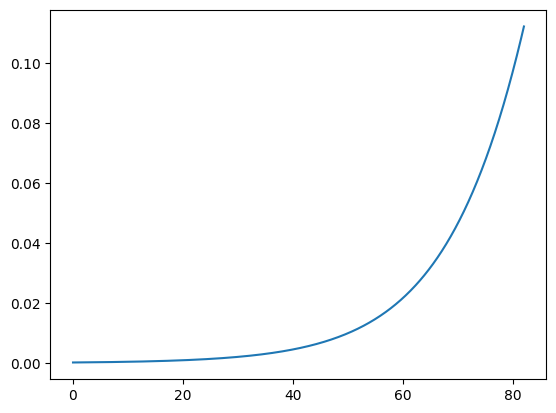

In [ ]:
x_line = np.arange(x_train.min(), x_train.max(), 0.1)
y_line = 1 / (1 + np.exp(-(m * x_line + c)))  # logistic Sigmoid function

plt.plot(x_line, y_line, )
#plt.scatter(x_train, y_train, label='Training Data', edgecolors='k', marker='o')


print('Training Score:', alg.score(x_train, y_train))
print('Testing Score:', alg.score(x_test, y_test))
